# 3. Übungsblatt
## 2. Aufgabe (K-Nearest-Neighbor Algorithmus)
In dieser Aufgabe sollen Sie den K-Nearest-Neighbor Algorithmus implementieren. Dabei beschränken wir uns auf Datenpunkte $x^{(i)} \in \mathbb{R}^2$, wobei wir mit $x^{(i)}$ den $i-$ten Datenpunkt bezeichnen. Das heißt, ähnlich wie das Fische-Beispiel aus der Vorlesung, bestehen unsere Datenpunkte aus zwei Features z. B. Größe und Farbe des Fischs.

<ins>Zur Funktionsweise des K-Nearest-Neighbor Algorithmus: </ins><br>
Es sei $\mathcal{X} := \big\{ x^{(1)},x^{(2)}, \ldots, x^{(n)} \big \vert x^{(i)} \in \mathbb{R}^2 \big\}$ unser Eingabe-Datensatz. Zu jedem Datenpunkt $x^{(i)}$ existiert ein Label $y^{(i)}$. Das Label beschreibt die Klasse zu dem dieser Datenpunkt gehört. Die Klassen in dem Fische-Beispiel aus der Vorlesung, waren *Seebarsch* und *Lachs*.<br>
Wenn wir für einen neuen Datenpunkt $x^{(neu)}$, dessen Klasse wir nicht kennen, die Klasse vorhersagen möchten, suchen wir zunächst mit Hilfe der euklidischen Distanz, die k nächsten Datenpunkte. Zur Erinnerung, die euklidische Distanz zwischen zwei Punkten $p, q \in \mathbb{R}^d$ ist definiert als:

$$
\parallel p - q \parallel_2 = \sqrt{\sum\limits_{r=1}^{d}(p_r - q_r)^2}
$$

Angenommen die k nächsten Datenpunkte sind $[x^{(1)}, x^{(2)}, \ldots, x^{(k)}]$, dann sind die zugehörigen Klassen gegeben durch

$$
\text{top_k_classes} := [y^{(1)}, y^{(2)}, \ldots, y^{(k)}]
$$

Jetzt prüfen wir nur noch, welche Klasse in $\text{top_k_classes}$ am häufigsten vorkommt und diese Klasse ordnen wir dann unserem Datenpunkt $x^{(neu)}$ zu. <br>
<br>
<br>

### 2.1. Daten einlesen
Wir stellen Ihnen verschiedene Datensätze zur Verfügung. Entscheiden Sie sich für einen und laden Sie die Datein. Die Daten bestehen aus drei Spalten x-Koordinate, y-Koordinate und Klasse. Die Klassennummerierung startet in jedem Datensatz bei 1.

In [187]:
CLUSTER_DATA_NUMBER = 1

import os
import numpy as np
import matplotlib.pyplot as plt
import heapq as hq

path = os.getcwd() + os.sep + "Cluster_Data_" + str(CLUSTER_DATA_NUMBER) + ".csv"
data = np.loadtxt(path, delimiter=' ')

### 2.2. Bestimmen sie die Anzahl der Klassen
Speichern Sie in einer Variable k, die Anzahl der Klassen für Ihren gewählten Datensatz.

In [188]:
dataT = np.transpose(data)
l = []
for a in dataT[2]:
    if not(a in l):
        l.append(a)
k = len(l)


### 2.3. Visualisieren der Daten
Verwenden Sie einen Scatter-Plot um den Datensatz zu visualisieren. Wenn Sie möchten, können Sie das Dictionary `color_dict` verwenden, um Datenpunkte mit gleicher Klasse, die gleiche Farbe zuzuordnen.

* [matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)
* [matplotlib.axes.Axes.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html)

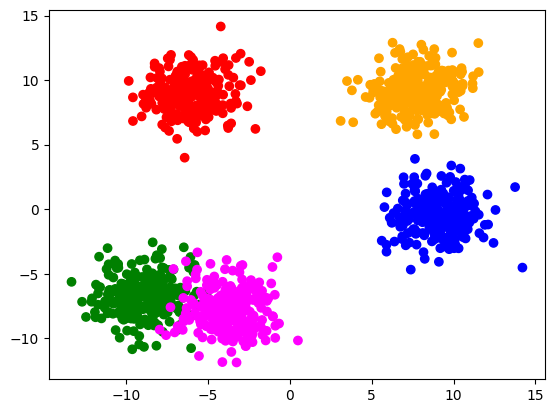

In [189]:
color_dict = {
    1: ["blue", [31, 119, 180]],
    2: ["orange", [255, 127, 14]],
    3: ["green", [44, 160, 44]],
    4: ["red", [214, 39, 40]],
    5: ["magenta", [148, 103, 189]]
}

def plot_cluster(data, num_clusters):
    c = []
    for dataC in data[2]:
        c += [color_dict[dataC][0]]

    plt.scatter(data[0], data[1], c=c)

plot_cluster(dataT, k)

### 2.4. Euklidische Distanz implementieren
Implementieren Sie als nächstes die euklidische Distanz, wie oben beschrieben.

In [190]:
def euclidian_distance(point_1, point_2):
    sum = 0
    
    for i in range(len(point_1)):
        sum += pow(point_1[i]-point_2[i], 2)

    return np.sqrt(sum)

euclidian_distance([1,2], [3,4])

2.8284271247461903

### 2.5. k-Nearest-Neighbor Algorithmus implementieren
Implementieren Sie nun den k-Nearest-Neighbor Algorithmus.

In [191]:
def k_nearest_neighbour(new_point, data, k):
    distance_list = []
    for point in data:
        d = euclidian_distance(new_point, point[:2])
        hq.heappush(distance_list, (d, point))

    kNN = [] 

    for i in range(k):
        kNN.append(hq.heappop(distance_list))
    return kNN


### 2.6. Klasse für neuen Datenpunkt bestimmen
Bestimmen Sie nun die Klasse für einen neuen Punkt Ihrer Wahl. Probieren Sie unterschiedliche Werte für k aus. Was fällt Ihnen dabei auf?

In [192]:
def get_class(new_point,data):
    kNN = k_nearest_neighbour(new_point, data, 1)
    classes = np.zeros(k)
    #[0 for i in range(k)]
    for (d,point) in kNN:
        classes[int(point[2]-1)] += 1

    x = np.where(classes == max(classes))[0][0]

    return x+1
print(get_class([1,1], data))

1


### 2.7. Klassenbereiche finden und visualisieren
Statt nur für einen einzigen Punkt die neue Klasse zu bestimmen, sollen Sie jetzt den gesamten Bildbereich in ein Raster einteilen um dann für jeden Mittelpunkt des Rasters die jeweilige Klasse zu bestimmen. Färben Sie anschließend diesen Bereich gemäß der berechneten Klasse. Verwenden Sie wieder unterschiedliche Werte für k und beschreiben Sie kurz, was Ihnen auffällt bzw wie sich die Ausgabe für unterschiedliche k ändert.

Zur Verdeutlichung der Idee, wurden zwei Plots erstellt: Der erste Plot mit Rasterlinien, der zweite ohne Rasterlinien. Es genügt wenn Sie einen der beiden Plots erstellen oder einen ähnlichen, der aber auch den Bereich der Klassen visualisiert.

<ins> Hinweis: </ins><br>
Ein Rasterabstand zwischen 0,5 und 1 ist ausreichend.

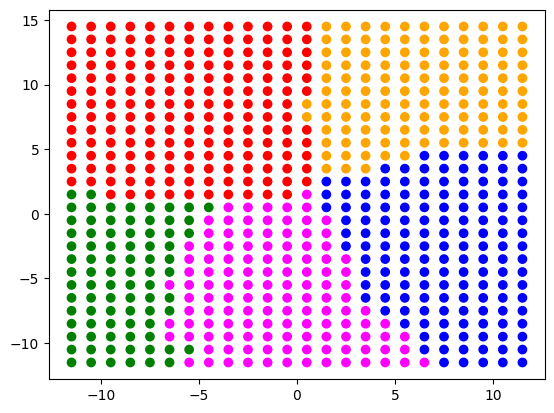

In [193]:
def plot_raster(minPoint, maxPoint, raster):
    x = minPoint[0]
    xs = []
    while x < maxPoint[0]:
        xs += [x + raster*0.5]
        x += raster

    y = minPoint[1]
    ys = []
    while y < maxPoint[1]:
        ys += [y + raster*0.5]
        y += raster


    xss = []
    yss = []
    cs = []
    for x in xs:
        for y in ys:
            xss += [x]
            yss += [y]
            cs += [color_dict[get_class([x,y], data)][0]]
    
    # print(xss)
    # print(yss)
    # print(cs)
    plt.scatter(xss, yss, c=cs)

plot_raster([-12,-12], [12,15], 1)